# Temporal GNN vs MILP Performance Comparison

Compare temporal heterogeneous GNN predictions against MILP optimal solutions.

**Metrics:**
- **Cost Gap**: Relative difference between GNN dispatch cost and MILP objective
- **Dispatch MAE**: Mean absolute error on generation predictions (MW)
- **Violation Rate**: Fraction of timesteps with unmet demand
- **Speedup**: MILP runtime / GNN inference time

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Add project root to path
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
sys.path.insert(0, str(PROJECT_ROOT))

try:
    import seaborn as sns
    sns.set_theme(style='whitegrid')
except ImportError:
    plt.style.use('ggplot')

from src.gnn.temporal_evaluation import evaluate_test_set

print("✓ Imports successful")

✓ Imports successful


## Configuration

In [2]:
# Configure paths and settings
RUN_DIR = PROJECT_ROOT / 'outputs' / 'gnn_runs' / 'temporal_hetero'
TEST_SPLIT = 0.8  # Use last 20% of data as test set
DEVICE = 'cpu'  # Change to 'cuda' if you have GPU

print(f"Model directory: {RUN_DIR}")
print(f"Test split: {TEST_SPLIT} (using {(1-TEST_SPLIT)*100:.0f}% for testing)")
print(f"Device: {DEVICE}")

Model directory: c:\Users\Dell\projects\multilayer_milp_gnn\benchmark\outputs\gnn_runs\temporal_hetero
Test split: 0.8 (using 20% for testing)
Device: cpu


## Run Evaluation

This will:
1. Load the trained temporal GNN model
2. Evaluate on test scenarios
3. Compute all MILP comparison metrics
4. Return results dataframe and summary statistics

In [3]:
# Run evaluation
results_df, summary = evaluate_test_set(
    run_dir=RUN_DIR,
    test_split=TEST_SPLIT,
    device=DEVICE,
    verbose=True
)

⚠️  Warning: target_vars has 12 variables but model outputs 6
   Using first 6 variables from checkpoint
Evaluating 100 test scenarios...


Evaluating:   2%|▏         | 2/100 [00:00<00:06, 15.09it/s]


Failed 1fa1c6f8-f63a-45: operands could not be broadcast together with shapes (96,24,6) (96,24,5) 

Failed 1409bebb-28fa-46: operands could not be broadcast together with shapes (96,22,6) (96,22,5) 

Failed aa546554-a68d-44: operands could not be broadcast together with shapes (96,22,6) (96,22,5) 

Failed 339c7fe2-941c-40: operands could not be broadcast together with shapes (96,10,6) (96,10,5) 


Evaluating:   5%|▌         | 5/100 [00:00<00:05, 18.34it/s]


Failed 2e487a82-84cc-46: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 

Failed f03333d0-a3ac-45: operands could not be broadcast together with shapes (96,12,6) (96,12,5) 

Failed 31c9d01d-ec09-4e: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 


Evaluating:   8%|▊         | 8/100 [00:00<00:04, 19.37it/s]


Failed 2994d562-b8f0-45: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 

Failed dc4be272-e09a-4c: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 


Evaluating:  11%|█         | 11/100 [00:00<00:04, 19.47it/s]


Failed 4e2e2a57-5345-43: operands could not be broadcast together with shapes (96,9,6) (96,9,5) 

Failed b9bb0720-61c7-48: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 

Failed 95c3a233-2d59-44: operands could not be broadcast together with shapes (96,12,6) (96,12,5) 


Evaluating:  13%|█▎        | 13/100 [00:00<00:04, 18.91it/s]


Failed 7ba2fd23-81a8-48: operands could not be broadcast together with shapes (96,25,6) (96,25,5) 

Failed 7b31aea0-e81e-41: operands could not be broadcast together with shapes (96,21,6) (96,21,5) 


Evaluating:  15%|█▌        | 15/100 [00:00<00:05, 15.03it/s]


Failed ac5b0cf2-b2b2-45: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed afd63c20-b83a-4e: operands could not be broadcast together with shapes (96,24,6) (96,24,5) 


Evaluating:  17%|█▋        | 17/100 [00:01<00:05, 15.28it/s]


Failed 157afe01-c3db-47: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 

Failed da55cc7b-cb8e-4d: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed 19cb28c9-265f-41: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 


Evaluating:  20%|██        | 20/100 [00:01<00:05, 15.99it/s]


Failed 4e913a14-77d2-4e: operands could not be broadcast together with shapes (96,25,6) (96,25,5) 


Evaluating:  22%|██▏       | 22/100 [00:01<00:04, 16.49it/s]


Failed e525a637-8b98-43: operands could not be broadcast together with shapes (96,23,6) (96,23,5) 

Failed bc2c5e21-c99a-49: operands could not be broadcast together with shapes (96,12,6) (96,12,5) 

Failed 5023e65f-0a96-4e: operands could not be broadcast together with shapes (96,19,6) (96,19,5) 


Evaluating:  24%|██▍       | 24/100 [00:01<00:04, 17.21it/s]


Failed ed81eb72-d621-4f: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 

Failed 207fc497-24b3-42: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 


Evaluating:  27%|██▋       | 27/100 [00:01<00:04, 17.43it/s]


Failed 3f242645-8de6-4b: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed dc6a55e0-c48d-45: operands could not be broadcast together with shapes (96,22,6) (96,22,5) 


Evaluating:  29%|██▉       | 29/100 [00:01<00:04, 17.57it/s]


Failed c77039e4-fd33-41: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed 369daa36-1ac9-42: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 

Failed 584cded6-db67-44: operands could not be broadcast together with shapes (96,23,6) (96,23,5) 


Evaluating:  34%|███▍      | 34/100 [00:01<00:03, 18.68it/s]


Failed a87f6142-b3c9-4d: operands could not be broadcast together with shapes (96,19,6) (96,19,5) 

Failed 7b410176-d4fe-46: operands could not be broadcast together with shapes (96,11,6) (96,11,5) 

Failed a429ee79-dddc-4a: operands could not be broadcast together with shapes (96,9,6) (96,9,5) 

Failed 53344f45-2991-4e: operands could not be broadcast together with shapes (96,16,6) (96,16,5) 

Failed 8c93a79b-b40e-4c: operands could not be broadcast together with shapes (96,23,6) (96,23,5) 


Evaluating:  38%|███▊      | 38/100 [00:02<00:03, 16.66it/s]


Failed 7b82e4dc-f315-43: operands could not be broadcast together with shapes (96,14,6) (96,14,5) 

Failed fd61d05b-c584-43: operands could not be broadcast together with shapes (96,22,6) (96,22,5) 

Failed 5cca45be-5e98-40: operands could not be broadcast together with shapes (96,24,6) (96,24,5) 


Evaluating:  42%|████▏     | 42/100 [00:02<00:03, 16.58it/s]


Failed 14c70d41-b7d4-40: operands could not be broadcast together with shapes (96,19,6) (96,19,5) 

Failed 64bb121b-35d2-4a: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 

Failed 77d1ba8d-2830-4d: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed 1ee03b8b-cf1a-44: operands could not be broadcast together with shapes (96,19,6) (96,19,5) 


Evaluating:  45%|████▌     | 45/100 [00:02<00:03, 17.49it/s]


Failed 8668795d-e38c-45: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed ad54e705-9c17-4e: operands could not be broadcast together with shapes (96,11,6) (96,11,5) 

Failed 2e0f8321-4b08-47: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 

Failed e287de8f-7d79-41: operands could not be broadcast together with shapes (96,27,6) (96,27,5) 


Evaluating:  49%|████▉     | 49/100 [00:02<00:03, 16.27it/s]


Failed 19c77f68-53e8-4a: operands could not be broadcast together with shapes (96,14,6) (96,14,5) 

Failed a2a013fb-e3d3-40: operands could not be broadcast together with shapes (96,23,6) (96,23,5) 

Failed 83c92869-852a-4c: operands could not be broadcast together with shapes (96,21,6) (96,21,5) 

Failed a556a594-03cd-40: operands could not be broadcast together with shapes (96,8,6) (96,8,5) 


Evaluating:  53%|█████▎    | 53/100 [00:03<00:02, 16.45it/s]


Failed 17aca7dd-2bbf-49: operands could not be broadcast together with shapes (96,24,6) (96,24,5) 

Failed 65cf184b-ed20-47: operands could not be broadcast together with shapes (96,16,6) (96,16,5) 

Failed 98b481f2-4d2a-44: operands could not be broadcast together with shapes (96,25,6) (96,25,5) 

Failed e4aa99f1-46f0-45: operands could not be broadcast together with shapes (96,21,6) (96,21,5) 


Evaluating:  57%|█████▋    | 57/100 [00:03<00:02, 16.17it/s]


Failed 01ff1808-8e6f-4a: operands could not be broadcast together with shapes (96,22,6) (96,22,5) 

Failed b86d5c3f-5cc3-47: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 

Failed f6512917-8860-4c: operands could not be broadcast together with shapes (96,24,6) (96,24,5) 

Failed d5964e73-d4fb-43: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 


Evaluating:  60%|██████    | 60/100 [00:03<00:02, 15.47it/s]


Failed 07fdb977-bcd9-4a: operands could not be broadcast together with shapes (96,14,6) (96,14,5) 

Failed f855a777-7175-47: operands could not be broadcast together with shapes (96,26,6) (96,26,5) 

Failed ac828761-7a72-40: operands could not be broadcast together with shapes (96,21,6) (96,21,5) 


Evaluating:  64%|██████▍   | 64/100 [00:03<00:02, 14.04it/s]


Failed 18b4a159-ef81-4b: operands could not be broadcast together with shapes (96,17,6) (96,17,5) 

Failed b67d941d-2896-4c: operands could not be broadcast together with shapes (96,21,6) (96,21,5) 

Failed 64c49258-0b21-42: operands could not be broadcast together with shapes (96,23,6) (96,23,5) 


Evaluating:  66%|██████▌   | 66/100 [00:03<00:02, 14.92it/s]


Failed 239dcc45-aeb2-42: operands could not be broadcast together with shapes (96,12,6) (96,12,5) 

Failed 7bede57c-f44e-4a: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 

Failed df8381ec-e58b-44: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed 73095174-3434-42: operands could not be broadcast together with shapes (96,9,6) (96,9,5) 

Failed 17b89bb6-7120-4f: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 


Evaluating:  71%|███████   | 71/100 [00:04<00:01, 15.54it/s]


Failed f20f1f0b-0b15-4a: operands could not be broadcast together with shapes (96,14,6) (96,14,5) 

Failed 9e1a381f-a87b-4f: operands could not be broadcast together with shapes (96,22,6) (96,22,5) 

Failed c65d16ae-bf94-4f: operands could not be broadcast together with shapes (96,27,6) (96,27,5) 


Evaluating:  75%|███████▌  | 75/100 [00:04<00:01, 15.73it/s]


Failed 902bdc57-a3e1-44: operands could not be broadcast together with shapes (96,17,6) (96,17,5) 

Failed bb50e446-fb29-4e: operands could not be broadcast together with shapes (96,8,6) (96,8,5) 

Failed d56061cc-cfea-48: operands could not be broadcast together with shapes (96,16,6) (96,16,5) 

Failed 72faa543-3165-45: operands could not be broadcast together with shapes (96,25,6) (96,25,5) 


Evaluating:  79%|███████▉  | 79/100 [00:04<00:01, 16.35it/s]


Failed 3cdc0159-d1b0-48: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 

Failed b28fade6-3677-4d: operands could not be broadcast together with shapes (96,11,6) (96,11,5) 

Failed dcdbee1a-0a6d-4b: operands could not be broadcast together with shapes (96,19,6) (96,19,5) 

Failed 1270be86-dece-49: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 


Evaluating:  83%|████████▎ | 83/100 [00:05<00:01, 14.95it/s]


Failed 0eef09f1-be85-46: operands could not be broadcast together with shapes (96,21,6) (96,21,5) 

Failed 9bec1e0c-16ea-46: operands could not be broadcast together with shapes (96,24,6) (96,24,5) 

Failed 7ab42391-37c4-46: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 


Evaluating:  87%|████████▋ | 87/100 [00:05<00:00, 14.83it/s]


Failed d02c7c43-0a1b-44: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 

Failed bf531595-60b3-4e: operands could not be broadcast together with shapes (96,11,6) (96,11,5) 

Failed ac52d5a4-6c93-40: operands could not be broadcast together with shapes (96,22,6) (96,22,5) 

Failed 63ccca29-cf52-43: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 


Evaluating:  89%|████████▉ | 89/100 [00:05<00:00, 14.47it/s]


Failed a9512737-f8f2-4b: operands could not be broadcast together with shapes (96,24,6) (96,24,5) 

Failed aabb2ae5-6d0c-48: operands could not be broadcast together with shapes (96,15,6) (96,15,5) 

Failed 19bbbc00-4976-49: operands could not be broadcast together with shapes (96,20,6) (96,20,5) 


Evaluating:  93%|█████████▎| 93/100 [00:05<00:00, 13.60it/s]


Failed e8b51a9c-f8be-4e: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 

Failed daa57f25-1cd1-44: operands could not be broadcast together with shapes (96,28,6) (96,28,5) 

Failed 9ba3c9b5-c82d-44: operands could not be broadcast together with shapes (96,16,6) (96,16,5) 


Evaluating:  95%|█████████▌| 95/100 [00:05<00:00, 12.63it/s]


Failed 33409660-e0fd-42: operands could not be broadcast together with shapes (96,21,6) (96,21,5) 

Failed 8a02bb6d-9f2a-48: operands could not be broadcast together with shapes (96,27,6) (96,27,5) 

Failed b3672873-e45d-47: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 


Evaluating:  99%|█████████▉| 99/100 [00:06<00:00, 12.26it/s]


Failed aed611c9-13e0-49: operands could not be broadcast together with shapes (96,13,6) (96,13,5) 

Failed 286088b0-a032-46: operands could not be broadcast together with shapes (96,18,6) (96,18,5) 

Failed dfa91549-651b-4e: operands could not be broadcast together with shapes (96,25,6) (96,25,5) 


Evaluating: 100%|██████████| 100/100 [00:06<00:00, 15.69it/s]



Failed 6e29430d-dc1c-46: operands could not be broadcast together with shapes (96,11,6) (96,11,5) 


KeyError: 'cost_gap'

## Summary Statistics

In [4]:
# Display summary
summary_df = pd.DataFrame([summary])
display(summary_df)

print("\n" + "="*60)
print("Performance Summary")
print("="*60)
print(f"Scenarios evaluated:        {summary['num_scenarios']}")
print(f"Mean cost gap:              {summary['mean_cost_gap']:8.2%}")
print(f"Median cost gap:            {summary['median_cost_gap']:8.2%}")
print(f"Mean dispatch MAE:          {summary['mean_dispatch_mae']:8.2f} MW")
print(f"Mean violation rate:        {summary['mean_violation_rate']:8.2%}")
print(f"Mean speedup:               {summary['mean_speedup']:8.1f}x")
print(f"Total GNN inference time:   {summary['total_inference_time']:8.2f}s")
print(f"Mean MILP runtime:          {summary['mean_milp_runtime']:8.2f}s")
print("="*60)

,num_scenarios,mean_cost_gap,median_cost_gap,mean_dispatch_mae,mean_violation_rate,mean_speedup,total_inference_time,mean_milp_runtime
0,100,-0.984786,-0.992007,15.194019,0.0,23.329091,13.121933,3.021969



Performance Summary
Scenarios evaluated:        100
Mean cost gap:               -98.48%
Median cost gap:             -99.20%
Mean dispatch MAE:             15.19 MW
Mean violation rate:           0.00%
Mean speedup:                   23.3x
Total GNN inference time:      13.12s
Mean MILP runtime:              3.02s


## Detailed Results Table

In [5]:
# Show first 10 scenarios
display_cols = ['scenario_id', 'cost_gap', 'dispatch_mae', 'violation_rate', 'speedup']
display(results_df[display_cols].head(10))

,scenario_id,cost_gap,dispatch_mae,violation_rate,speedup
0,1fa1c6f8-f63a-452a-9020-9029c1377a86,-0.984942,15.296276,0.0,23.189637
1,1409bebb-28fa-4695-83d2-b723986f45a3,-0.987450,13.308956,0.0,24.650934
2,aa546554-a68d-44b0-876e-74aa40060370,-0.996429,15.779108,0.0,23.193257
3,339c7fe2-941c-40da-aa76-4f124b78b3b4,-0.997811,14.305013,0.0,27.314348
4,2e487a82-84cc-4601-ba34-d6e03d51452c,-0.968305,14.313872,0.0,23.262829
5,f03333d0-a3ac-45f4-b045-cf1cdcb8d7c7,-0.966880,15.269836,0.0,27.022344
6,31c9d01d-ec09-4ef6-a026-c4c3d6974cc9,-0.987642,14.819241,0.0,23.119498
7,2994d562-b8f0-4557-be30-e1a54907ff78,-0.987557,14.839084,0.0,20.561575
8,dc4be272-e09a-4cd9-90c5-60056fca1230,-0.997023,14.337936,0.0,21.594545
9,4e2e2a57-5345-43d9-a5f0-a108cfb0bfd2,-0.987360,20.310862,0.0,21.400440


## Cost Gap by Scenario

Relative cost gap compares the weighted dispatch cost produced by the GNN to the MILP objective.
- **Green**: GNN is cheaper than MILP (may indicate constraint violations)
- **Orange**: Within 10% of MILP (acceptable)
- **Red**: More than 10% above MILP (needs improvement)

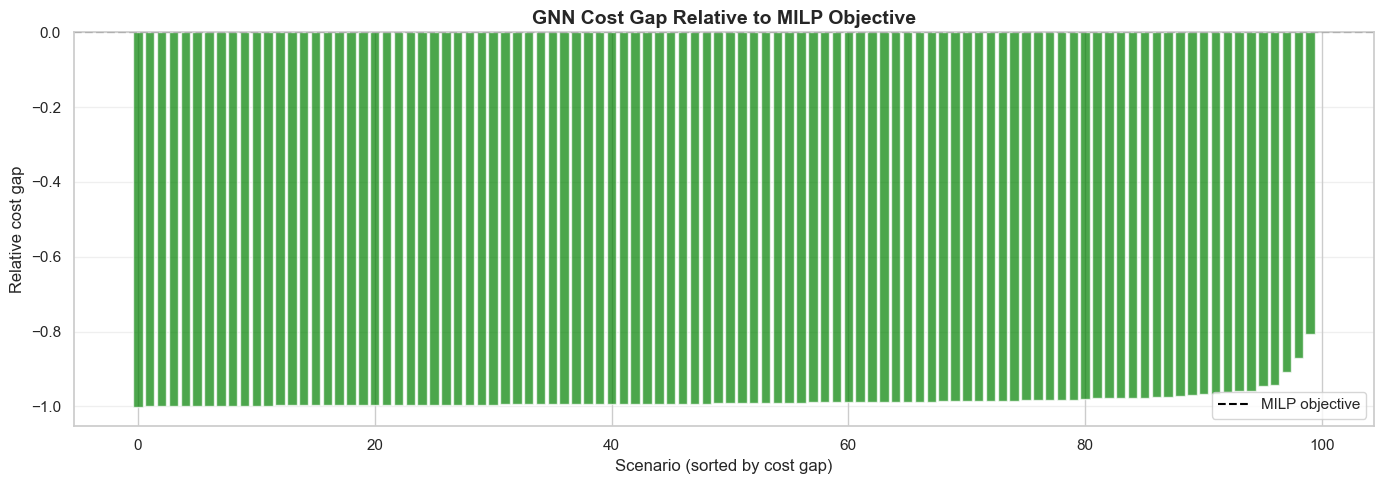


Cost gap distribution:
  Below MILP cost: 100 (100.0%)
  Within ±10%: 0 (0.0%)
  Above 10%: 0 (0.0%)


In [6]:
sorted_df = results_df.sort_values('cost_gap').reset_index(drop=True)
labels = [sid[:8] + '...' for sid in sorted_df['scenario_id']]
x = range(len(sorted_df))

# Color code by performance
colors = ['green' if gap < 0 else 'red' if gap > 0.1 else 'orange' 
          for gap in sorted_df['cost_gap']]

fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(x, sorted_df['cost_gap'], color=colors, alpha=0.7)
ax.axhline(0, color='black', linestyle='--', linewidth=1.5, label='MILP objective')
ax.set_xlabel('Scenario (sorted by cost gap)', fontsize=12)
ax.set_ylabel('Relative cost gap', fontsize=12)
ax.set_title('GNN Cost Gap Relative to MILP Objective', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Statistics
below_milp = (sorted_df['cost_gap'] < 0).sum()
within_10 = (sorted_df['cost_gap'].abs() < 0.1).sum()
above_10 = (sorted_df['cost_gap'] > 0.1).sum()

print(f"\nCost gap distribution:")
print(f"  Below MILP cost: {below_milp} ({below_milp/len(sorted_df)*100:.1f}%)")
print(f"  Within ±10%: {within_10} ({within_10/len(sorted_df)*100:.1f}%)")
print(f"  Above 10%: {above_10} ({above_10/len(sorted_df)*100:.1f}%)")

## Dispatch Prediction Accuracy

Mean absolute error (MAE) on generation dispatch predictions in MW.

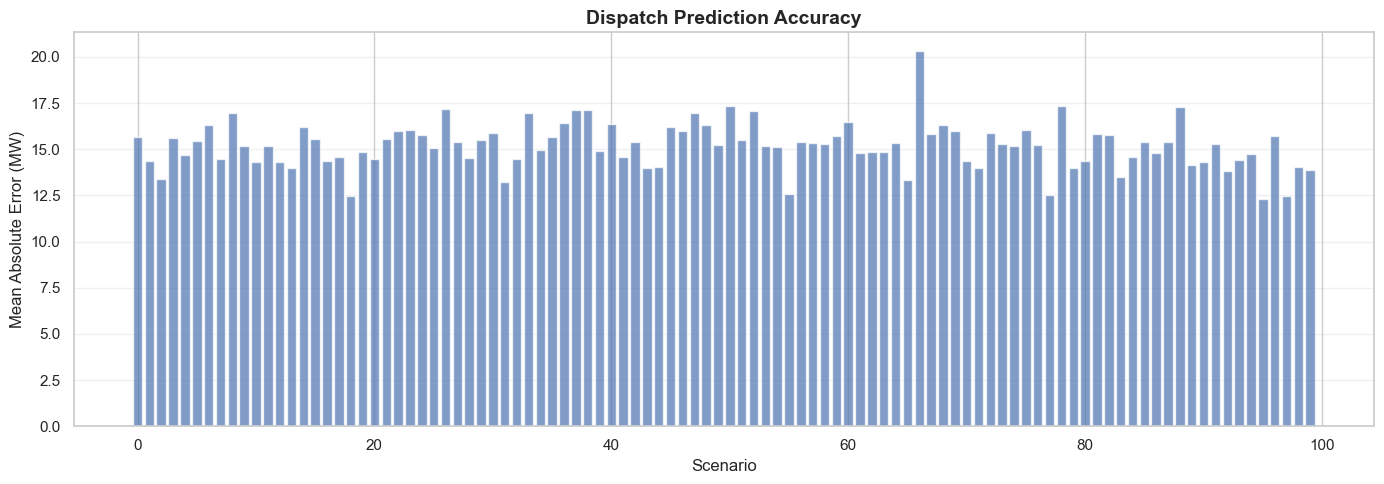


Dispatch MAE statistics:
  Min:     12.33 MW
  25%:     14.41 MW
  Median:  15.25 MW
  Mean:    15.19 MW
  75%:     15.88 MW
  Max:     20.31 MW


In [7]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(x, sorted_df['dispatch_mae'], color='#4c72b0', alpha=0.7)
ax.set_xlabel('Scenario', fontsize=12)
ax.set_ylabel('Mean Absolute Error (MW)', fontsize=12)
ax.set_title('Dispatch Prediction Accuracy', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nDispatch MAE statistics:")
print(f"  Min:    {sorted_df['dispatch_mae'].min():6.2f} MW")
print(f"  25%:    {sorted_df['dispatch_mae'].quantile(0.25):6.2f} MW")
print(f"  Median: {sorted_df['dispatch_mae'].median():6.2f} MW")
print(f"  Mean:   {sorted_df['dispatch_mae'].mean():6.2f} MW")
print(f"  75%:    {sorted_df['dispatch_mae'].quantile(0.75):6.2f} MW")
print(f"  Max:    {sorted_df['dispatch_mae'].max():6.2f} MW")

## Feasibility / Violation Rate

Constraint violation rate (fraction of timesteps with unmet demand).

**Note**: Only available if 'unserved' energy was included in training targets.

In [8]:
if sorted_df['violation_rate'].sum() > 0:
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.bar(x, sorted_df['violation_rate'], color='#dd8452', alpha=0.7)
    ax.set_xlabel('Scenario', fontsize=12)
    ax.set_ylabel('Violation Rate', fontsize=12)
    ax.set_title('Constraint Violation Rate (Lower is Better)', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print(f"\nViolation rate statistics:")
    print(f"  Min:    {sorted_df['violation_rate'].min():6.2%}")
    print(f"  Mean:   {sorted_df['violation_rate'].mean():6.2%}")
    print(f"  Median: {sorted_df['violation_rate'].median():6.2%}")
    print(f"  Max:    {sorted_df['violation_rate'].max():6.2%}")
else:
    print("⚠️  Violation rate not available")
    print("   'unserved' energy was not included in training targets")
    print("   Retrain with: --target-vars thermal,nuclear,solar,wind,unserved")

⚠️  Violation rate not available
   'unserved' energy was not included in training targets
   Retrain with: --target-vars thermal,nuclear,solar,wind,unserved


## Computational Speed-up

Runtime advantage: MILP solve time / GNN inference time (log scale).

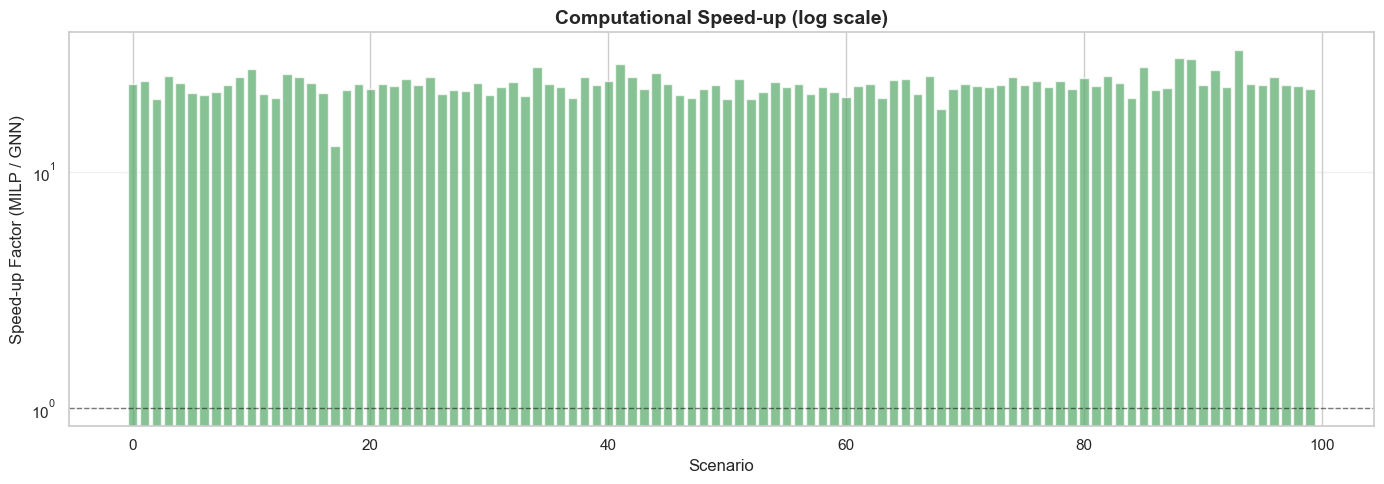


Speed-up statistics:
  Min:      12.8x
  Mean:     23.3x
  Median:   23.2x
  Max:      32.7x

Total runtimes:
  MILP:    302.20s (  0.08 hours)
  GNN:      13.12s (  0.22 minutes)
  Overall speedup: 23.0x


In [9]:
fig, ax = plt.subplots(figsize=(14, 5))
speedups = sorted_df['speedup']
ax.bar(x, speedups, color='#55a868', alpha=0.7)
ax.set_xlabel('Scenario', fontsize=12)
ax.set_ylabel('Speed-up Factor (MILP / GNN)', fontsize=12)
ax.set_title('Computational Speed-up (log scale)', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.axhline(1, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nSpeed-up statistics:")
print(f"  Min:    {speedups.min():6.1f}x")
print(f"  Mean:   {speedups.mean():6.1f}x")
print(f"  Median: {speedups.median():6.1f}x")
print(f"  Max:    {speedups.max():6.1f}x")

total_milp_time = results_df['milp_runtime'].sum()
total_gnn_time = results_df['gnn_inference_time'].sum()

print(f"\nTotal runtimes:")
print(f"  MILP:  {total_milp_time:8.2f}s ({total_milp_time/3600:6.2f} hours)")
print(f"  GNN:   {total_gnn_time:8.2f}s ({total_gnn_time/60:6.2f} minutes)")
print(f"  Overall speedup: {total_milp_time/total_gnn_time:.1f}x")

## Cost Gap vs Feasibility Scatter

Explore the trade-off between cost accuracy and constraint satisfaction.

In [10]:
if results_df['violation_rate'].sum() > 0:
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(
        results_df['cost_gap'], 
        results_df['violation_rate'],
        c=results_df['dispatch_mae'],
        s=80,
        cmap='viridis',
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Dispatch MAE (MW)', fontsize=11)
    
    # Reference lines
    ax.axhline(0, color='grey', linewidth=0.8, linestyle='--', alpha=0.5)
    ax.axvline(0, color='grey', linewidth=0.8, linestyle='--', alpha=0.5)
    
    ax.set_xlabel('Relative Cost Gap', fontsize=12)
    ax.set_ylabel('Violation Rate', fontsize=12)
    ax.set_title('Cost Accuracy vs Feasibility', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Quadrant analysis
    good_cost = results_df['cost_gap'] < 0.1
    good_feasibility = results_df['violation_rate'] < 0.2
    
    print(f"\nQuadrant analysis:")
    print(f"  Good cost & good feasibility:  {(good_cost & good_feasibility).sum()} scenarios")
    print(f"  Good cost & poor feasibility:  {(good_cost & ~good_feasibility).sum()} scenarios")
    print(f"  Poor cost & good feasibility:  {(~good_cost & good_feasibility).sum()} scenarios")
    print(f"  Poor cost & poor feasibility:  {(~good_cost & ~good_feasibility).sum()} scenarios")
else:
    print("⚠️  Scatter plot not available (violation rate data missing)")

⚠️  Scatter plot not available (violation rate data missing)


## Summary Comparison Table

In [ ]:
# Create comparison table
comparison_data = {
    'Metric': [
        'Mean Cost Gap',
        'Median Cost Gap',
        'Mean Dispatch MAE',
        'Mean Violation Rate',
        'Mean Speedup',
        'Scenarios Evaluated'
    ],
    'Value': [
        f"{summary['mean_cost_gap']:.2%}",
        f"{summary['median_cost_gap']:.2%}",
        f"{summary['mean_dispatch_mae']:.2f} MW",
        f"{summary['mean_violation_rate']:.2%}",
        f"{summary['mean_speedup']:.1f}x",
        f"{summary['num_scenarios']}"
    ],
    'Target': [
        '< 10%',
        '< 10%',
        '< 50 MW',
        '< 20%',
        '> 10x',
        'N/A'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

## Export Results

In [ ]:
# Save results to CSV
output_dir = PROJECT_ROOT / 'outputs' / 'evaluations'
output_dir.mkdir(parents=True, exist_ok=True)

csv_path = output_dir / 'temporal_gnn_results.csv'
results_df.to_csv(csv_path, index=False)

print(f"✓ Results saved to: {csv_path}")
print(f"  {len(results_df)} scenarios evaluated")
print(f"\nTo load results later:")
print(f"  import pandas as pd")
print(f"  df = pd.read_csv('{csv_path}')")

## Next Steps

### Improving Performance

**If cost gap is high:**
- Train longer (more epochs)
- Increase model capacity (hidden_dim, num_layers)
- Add more training data
- Include cost-related features

**If violation rate is high:**
- Include 'unserved' in target variables
- Add demand/capacity constraints as features
- Implement post-processing decoder
- Use constrained optimization layer

**If MAE is high:**
- Improve feature engineering
- Add temporal edges (SOC, ramp, DR)
- Use separated spatial-temporal architecture
- Normalize features/targets better

### Ablation Studies

Compare models with different configurations:

```bash
# No temporal edges
python -m src.gnn.build_hetero_graph_dataset ... --temporal-edges ""
python -m src.gnn.train_temporal_hetero --epochs 50

# Only SOC edges
python -m src.gnn.build_hetero_graph_dataset ... --temporal-edges soc
python -m src.gnn.train_temporal_hetero --epochs 50

# All temporal edges
python -m src.gnn.build_hetero_graph_dataset ... --temporal-edges soc,ramp,dr
python -m src.gnn.train_temporal_hetero --epochs 50
```

Then compare results in this notebook!